In [231]:
pip install tslearn

Note: you may need to restart the kernel to use updated packages.


In [232]:
import pandas as pd
import matplotlib.pyplot as plt
# Preprocessing
from sklearn.preprocessing import MinMaxScaler
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler
# Algorithms
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans

In [233]:
from google.colab import files
files.upload()

ModuleNotFoundError: No module named 'google'

In [234]:
df = pd.read_csv('demo5stock.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.drop(['year'], axis = 1, inplace = True)
df_hpg = df['HPG']
df_vcb = df['VCB']
df_aaa = df['AAA']
df_flc = df['FLC']
df_vic = df['VIC']
df

,HPG,VCB,AAA,FLC,VIC
0,46.50,100.0,17.00,15.00,103.1
1,47.10,99.2,16.80,15.30,107.0
2,47.20,98.7,16.60,14.90,105.9
3,47.60,98.2,16.55,14.70,106.7
4,45.75,95.4,16.25,14.55,105.6
...,...,...,...,...,...
230,42.75,104.8,15.15,4.44,111.8
231,42.80,107.0,15.20,4.43,110.1
232,42.80,105.0,14.55,4.39,110.2
233,42.35,99.3,14.50,4.49,109.7


In [235]:
mySeries = [df_hpg, df_vcb, df_aaa, df_flc, df_vic]
stockName = list(df.columns)
print((stockName))
print(len(mySeries))

['HPG', 'VCB', 'AAA', 'FLC', 'VIC']
5


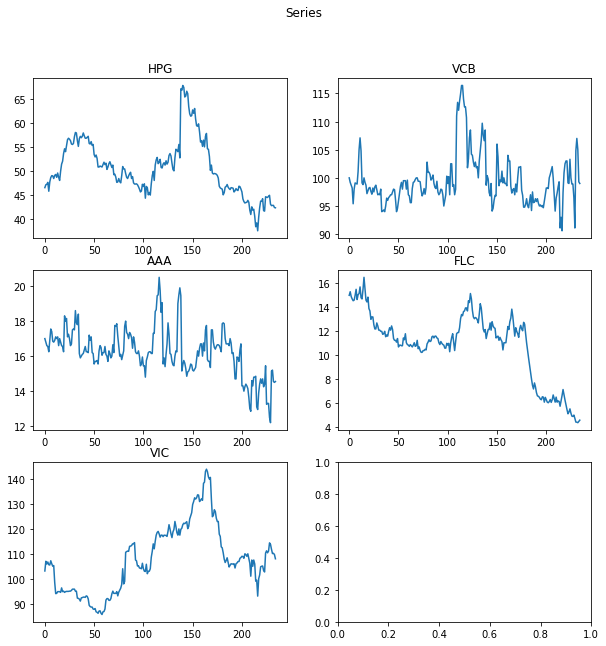

In [236]:
fig, axs = plt.subplots(3,2,figsize=(10,10))
fig.suptitle('Series')
for i in range(3):
    for j in range(2):
        if i*2+j+1>len(mySeries): # pass the others that can't fill
            continue
        axs[i, j].plot(mySeries[i*2+j].values)
        axs[i, j].set_title(stockName[i*2+j])
plt.show()

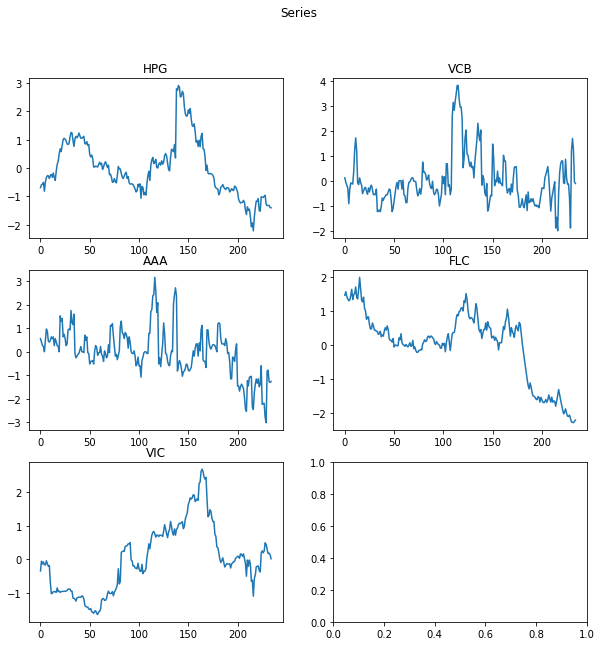

In [237]:

mySeries = TimeSeriesScalerMeanVariance().fit_transform(mySeries)
fig, axs = plt.subplots(3,2,figsize=(10,10))
fig.suptitle('Series')
for i in range(3):
    for j in range(2):
        if i*2+j+1>len(mySeries): # pass the others that can't fill
            continue
        axs[i, j].plot(mySeries[i*2+j])
        axs[i, j].set_title(stockName[i*2+j])
plt.show()
#print(mySeries.shape)

C:\Users\danhb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


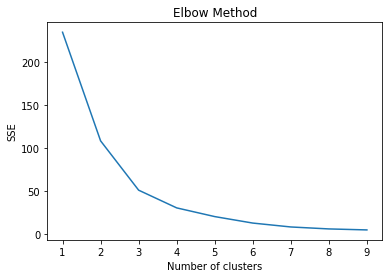

In [238]:
inertia_list = []
for k in range(1, 10):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(mySeries[i])
  inertia_list.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia_list)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

(5, 235, 1)
[[[-0.69233793]
  [-0.59070373]
  [-0.5737647 ]
  ...
  [-1.31908217]
  [-1.39530781]
  [-1.40377733]]

 [[ 0.1155224 ]
  [-0.06516155]
  [-0.17808902]
  ...
  [ 1.24479708]
  [-0.04257606]
  [-0.11033254]]

 [[ 0.56711498]
  [ 0.41795771]
  [ 0.26880044]
  ...
  [-1.26006157]
  [-1.29735089]
  [-1.26006157]]

 [[ 1.45016963]
  [ 1.55568168]
  [ 1.41499895]
  ...
  [-2.28143998]
  [-2.2462693 ]
  [-2.20758154]]

 [[-0.3504149 ]
  [-0.06058974]
  [-0.1423353 ]
  ...
  [ 0.17721551]
  [ 0.14005844]
  [ 0.0137244 ]]]
Euclidean k-means
77.972 --> 47.034 --> 47.034 --> 
DBA k-means
Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished


27.899 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

11.335 --> 11.335 --> 
Init 2
28.507 --> 10.921 --> 10.921 --> 
Soft-DTW k-means
1933.811 --> 195.536 --> 195.497 --> 195.336 --> 195.440 --> 195.308 --> 195.417 --> 195.292 --> 195.188 --> 195.215 --> 195.230 --> 195.266 --> 195.220 --> 195.170 --> 195.184 --> 195.208 --> 195.168 --> 195.197 --> 195.160 --> 195.112 --> 195.124 --> 195.142 --> 195.122 --> 195.141 --> 195.117 --> 195.137 --> 195.110 --> 195.132 --> 195.104 --> 195.126 --> 195.098 --> 195.119 --> 195.096 --> 195.113 --> 195.094 --> 195.076 --> 195.083 --> 195.092 --> 195.084 --> 195.091 --> 195.086 --> 195.081 --> 195.083 --> 195.085 --> 195.083 --> 195.085 --> 195.084 --> 195.083 --> 195.083 --> 195.084 --> 


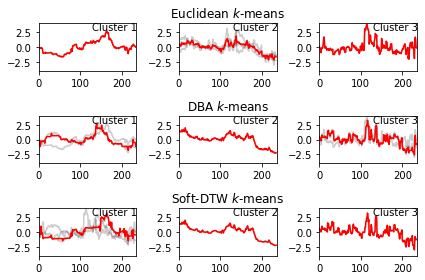

In [239]:
seed = 0
sz = mySeries.shape[1]
print(mySeries.shape)
print(mySeries)
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=3, verbose=True, random_state=seed)
y_pred = km.fit_predict(mySeries)

plt.figure()
for yi in range(3):
    plt.subplot(3, 3, yi + 1)
    for xx in mySeries[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

# DBA-k-means
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=3,
                          n_init=2,
                          metric="dtw",
                          verbose=True,
                          max_iter_barycenter=10,
                          random_state=seed)
y_pred = dba_km.fit_predict(mySeries)

for yi in range(3):
    plt.subplot(3, 3, 4 + yi)
    for xx in mySeries[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")

# Soft-DTW-k-means
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=3,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=seed)
y_pred = sdtw_km.fit_predict(mySeries)

for yi in range(3):
    plt.subplot(3, 3, 7 + yi)
    for xx in mySeries[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

plt.tight_layout()
plt.show()